# **Twitter's User Sentiment Analysis towards PeduliLindungi App**
*By: Rendy Kurniawan Emzet*<br></br>
*as a thesis on graduating Development Geography Department concentrating in Smart City*

<hr></hr>

## **1. Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import json
import os

from IPython.display import display

## **2. Cek list data dalam directory**

In [2]:
print('list file dalam directory:')
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        if filename[0] != '.' and '/.' not in dirname: #exclude hidden files
          print(dirname + '/' + filename)

list file dalam directory:
./jsonl_viewer.ipynb
./labelled.ipynb
./list_cleaned.txt
./location_fixer.ipynb
./output.png
./py copy.ipynb
./py.ipynb
./py.twb
./py2 copy.ipynb
./py2.ipynb
./py3 hashtag.ipynb
./py_merge.ipynb
./py_wordcloud - 2022.twb
./py_wordcloud.twb
./script.txt
./snscrape-tweet_pedulilindungi.ipynb
./tweets_scrapper.ipynb
.\rawdata/2021_tweets-utf8.json
.\rawdata/2022_tweets-utf8.json
.\wilayah_administratif_indonesia/docker-compose.yml
.\wilayah_administratif_indonesia/Dockerfile
.\wilayah_administratif_indonesia/license.md
.\wilayah_administratif_indonesia/odbl-10.md
.\wilayah_administratif_indonesia/README.md
.\wilayah_administratif_indonesia/setup.cfg
.\wilayah_administratif_indonesia\csv/districts.csv
.\wilayah_administratif_indonesia\csv/provinces.csv
.\wilayah_administratif_indonesia\csv/regencies.csv
.\wilayah_administratif_indonesia\csv/villages.csv
.\wilayah_administratif_indonesia\mysql/indonesia.sql
.\wilayah_administratif_indonesia\scripts/mdf_mysql_conve

## **3. Load data**

tweets dengan keyword "pedulilindungi" kurun 20 Agustus 2021 s/d 20 September 2021 dan 12 Januari 2022 s/d 12 Februari 2022

In [3]:
df = pd.concat([
    pd.json_normalize(pd.Series(open('./rawdata/2021_tweets-utf8.json').readlines()).apply(json.loads)),
    pd.json_normalize(pd.Series(open('./rawdata/2022_tweets-utf8.json').readlines()).apply(json.loads))
], ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Columns: 280 entries, _type to quotedTweet.quotedTweet.quotedTweet.cashtags
dtypes: bool(2), float64(104), int64(13), object(161)
memory usage: 147.1+ MB


## **4. Data Exploration**

In [5]:
df.select_dtypes(include="object").columns.tolist()

['_type',
 'url',
 'date',
 'content',
 'renderedContent',
 'lang',
 'source',
 'sourceUrl',
 'sourceLabel',
 'outlinks',
 'tcooutlinks',
 'media',
 'retweetedTweet',
 'mentionedUsers',
 'hashtags',
 'cashtags',
 'user._type',
 'user.username',
 'user.displayname',
 'user.description',
 'user.rawDescription',
 'user.descriptionUrls',
 'user.created',
 'user.location',
 'user.linkUrl',
 'user.linkTcourl',
 'user.profileImageUrl',
 'user.profileBannerUrl',
 'user.url',
 'inReplyToUser._type',
 'inReplyToUser.username',
 'inReplyToUser.displayname',
 'inReplyToUser.description',
 'inReplyToUser.rawDescription',
 'inReplyToUser.descriptionUrls',
 'inReplyToUser.verified',
 'inReplyToUser.created',
 'inReplyToUser.location',
 'inReplyToUser.protected',
 'inReplyToUser.linkUrl',
 'inReplyToUser.linkTcourl',
 'inReplyToUser.profileImageUrl',
 'inReplyToUser.profileBannerUrl',
 'inReplyToUser.url',
 'quotedTweet._type',
 'quotedTweet.url',
 'quotedTweet.date',
 'quotedTweet.content',
 'quotedT

In [7]:
df[['content','user.location','place.fullName','date']]

,content,user.location,place.fullName,date
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,Atlantis,NaN,2021-08-20T23:51:51+00:00
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,"ÜT: -6.1541602,106.7249617",NaN,2021-08-20T23:50:15+00:00
2,"@PLindungi pagi kak, bisa minta tolonh cek DM ...",,NaN,2021-08-20T23:45:01+00:00
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,Atlantis,NaN,2021-08-20T23:42:00+00:00
4,@reliesti @sarahnaulia @Kota_Tangerang @Raynal...,🌅,NaN,2021-08-20T23:41:39+00:00
...,...,...,...,...
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",SUB-MJK,NaN,2022-01-12T00:25:42+00:00
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,Medan - Sumut - Indonesia,NaN,2022-01-12T00:24:05+00:00
69282,@KemenkesRI web peduli lindungi kok not found ...,,NaN,2022-01-12T00:18:16+00:00
69283,"Vaksinasi Booster Dimulai Hari Ini, Cek Tiket ...","Jakarta, Indonesia",NaN,2022-01-12T00:15:07+00:00


In [8]:
df[['content','user.location','place.fullName','date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         69285 non-null  object
 1   user.location   69285 non-null  object
 2   place.fullName  1473 non-null   object
 3   date            69285 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


hanya 1.473 tweets yang memiliki geolocation

In [21]:
df[['content','user.location','place.name','date']][(df['place.name'].isna())&(df['user.location'] != '')]

,content,user.location,place.name,date
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,Atlantis,NaN,2021-08-20T23:51:51+00:00
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,"ÜT: -6.1541602,106.7249617",NaN,2021-08-20T23:50:15+00:00
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,Atlantis,NaN,2021-08-20T23:42:00+00:00
4,@reliesti @sarahnaulia @Kota_Tangerang @Raynal...,🌅,NaN,2021-08-20T23:41:39+00:00
6,@slippinunder1 @sarahnaulia @Kota_Tangerang @R...,JKT tanpa 48,NaN,2021-08-20T23:38:04+00:00
...,...,...,...,...
69278,@aden87 Saat ini KAI Commuter tetap konsisten ...,Jakarta Pusat,NaN,2022-01-12T00:27:38+00:00
69279,@kh_notodiputro @jokowi Cek langsung di aplika...,"Bogor, Indonesia",NaN,2022-01-12T00:26:59+00:00
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",SUB-MJK,NaN,2022-01-12T00:25:42+00:00
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,Medan - Sumut - Indonesia,NaN,2022-01-12T00:24:05+00:00


user defined location (yang ada di profil user) banyak yang tidak wajar

## **5. Data Preprocessing**

#### **1. Identifikasi lokasi tweets**

**define dataset lokasi**

In [16]:
df_kotakab = pd.read_csv("./wilayah_administratif_indonesia/regencies.csv")
df_prov = pd.read_csv("./wilayah_administratif_indonesia/provinces.csv")
df_kec = pd.read_csv("./wilayah_administratif_indonesia/districts.csv")

In [203]:
df_lokasi = pd.merge(pd.merge(df_kotakab, df_prov, on='id_prov', how='left'), df_kec, on='id_reg', how='left')
df_lokasi_kota = pd.merge(df_kotakab, df_prov, on='id_prov', how='left')

In [18]:
df_lokasi

,id_reg,id_prov,kota,provinsi,id_kec,kecamatan
0,1101,11,KABUPATEN SIMEULUE,ACEH,1101010,TEUPAH SELATAN
1,1101,11,KABUPATEN SIMEULUE,ACEH,1101020,SIMEULUE TIMUR
2,1101,11,KABUPATEN SIMEULUE,ACEH,1101021,TEUPAH BARAT
3,1101,11,KABUPATEN SIMEULUE,ACEH,1101022,TEUPAH TENGAH
4,1101,11,KABUPATEN SIMEULUE,ACEH,1101030,SIMEULUE TENGAH
...,...,...,...,...,...,...
7210,9471,94,KOTA JAYAPURA,PAPUA,9471010,MUARA TAMI
7211,9471,94,KOTA JAYAPURA,PAPUA,9471020,ABEPURA
7212,9471,94,KOTA JAYAPURA,PAPUA,9471021,HERAM
7213,9471,94,KOTA JAYAPURA,PAPUA,9471030,JAYAPURA SELATAN


**Menghubungkan dataset tweet dengan lokasi**

In [95]:
df_filtered = df[['content','user.location','place.name','date']].copy()
df_filtered['lokasi'] = np.nan
df_filtered

,content,user.location,place.name,date,lokasi
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,Atlantis,NaN,2021-08-20T23:51:51+00:00,NaN
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,"ÜT: -6.1541602,106.7249617",NaN,2021-08-20T23:50:15+00:00,NaN
2,"@PLindungi pagi kak, bisa minta tolonh cek DM ...",,NaN,2021-08-20T23:45:01+00:00,NaN
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,Atlantis,NaN,2021-08-20T23:42:00+00:00,NaN
4,@reliesti @sarahnaulia @Kota_Tangerang @Raynal...,🌅,NaN,2021-08-20T23:41:39+00:00,NaN
...,...,...,...,...,...
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",SUB-MJK,NaN,2022-01-12T00:25:42+00:00,NaN
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,Medan - Sumut - Indonesia,NaN,2022-01-12T00:24:05+00:00,NaN
69282,@KemenkesRI web peduli lindungi kok not found ...,,NaN,2022-01-12T00:18:16+00:00,NaN
69283,"Vaksinasi Booster Dimulai Hari Ini, Cek Tiket ...","Jakarta, Indonesia",NaN,2022-01-12T00:15:07+00:00,NaN


In [96]:
#dictionary lokasi
dict_loc_reg = dict(zip(df_lokasi.kecamatan,df_lokasi.kota))
dict_loc_reg_nospace = dict(zip(df_lokasi['kecamatan'].replace(' ','', regex=True),df_lokasi.kota))
dict_loc_city = dict(zip(df_lokasi.kota,df_lokasi.kota))
dict_loc_city_cleaned = dict(zip(df_lokasi['kota'].replace('KABUPATEN |KOTA ','', regex=True),df_lokasi.kota))
dict_loc_city_nospace = dict(zip(df_lokasi['kota'].replace(' ','', regex=True),df_lokasi.kota))
dict_loc_city_cleaned_nospace = dict(zip(df_lokasi['kota'].replace('KABUPATEN |KOTA | ','', regex=True),df_lokasi.kota)) #with kota/kab

list_loc_prov_cleaned = list(dict.fromkeys(df_lokasi.provinsi.str.replace(' ','', regex=True).tolist())) #delete duplicates


**handling geolocation, ubah geolocation (place.name) menjadi tingkat provinsi**

In [97]:
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['place.name'].str.upper().map(dict_loc_reg)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['place.name'].str.upper().replace(' ','', regex=True).map(dict_loc_reg_nospace)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['place.name'].str.upper().map(dict_loc_city)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['place.name'].str.upper().map(dict_loc_city_cleaned)

In [98]:
print('Jumlah place.name yang tidak terdeteksi sebesar ',  int(df_filtered[df_filtered['place.name'].notna()&df_filtered['lokasi'].isna()].shape[0]), ' dari total ', int(df_filtered[df_filtered['place.name'].notna()].shape[0]))

Jumlah place.name yang tidak terdeteksi sebesar  286  dari total  1473


In [99]:
#list place.name yang tidak terdeteksi
set(df_filtered['place.name'][df_filtered['place.name'].notna()&df_filtered['lokasi'].isna()].to_list())

{'Abu Dhabi',
 'Aeon Mall Sentul City',
 'Almadera Hotel Makassar',
 'Banten',
 'Basel',
 'Bogor Utara 2',
 'Budapest',
 'Canberra',
 'Cape Town',
 'Central Borneo',
 'Central East Mall Grand Indonesia , Central Jakarta',
 'Cikarang',
 'Cikeruh',
 'Cirebon Selatan',
 'Cirebon Utara',
 'Cologne',
 'DPRD Provinsi DKI Jakarta',
 'Dep. Penyakit Dalam RSPAD.Gatot Subroto',
 'East Borneo',
 'East Denpasar',
 'East Nusa Tenggara',
 'East Palu',
 'Four Points by Sheraton Surabaya, Pakuwon Indah',
 'Galeria Mall',
 'Gate 2',
 'Gelora Bung Karno',
 'Grand City',
 'Grand Indonesia East Mall',
 'Groningen',
 'Hartono Mall',
 'Indonesia',
 'Indonesian Embassy',
 'JIExpo Hall C',
 'Jakarta Capital Region',
 'Jogja National Museum',
 'Jongno-gu',
 'Kanwil Kemenkumham NTT',
 'Kartosuro',
 'Kebun Raya Residence',
 'Kedunghalang',
 'Kelurahan Menteng',
 'Kota Kasablanka',
 'Kota Magetan',
 'Kuala Lumpur City',
 'Kuta Cane',
 'Lima',
 'Mal Ciputra',
 'Mangunharjo',
 'Masjid Agung Sunda Kelapa',
 'Molucca

**handling user defined location**

In [100]:
df_filtered['user_location_cleaned'] = df_filtered['user.location'].str.upper().str.replace('[^A-Za-z]','', regex=True)
df_filtered.loc[df_filtered['user_location_cleaned'] == '', 'user_location_cleaned'] = np.nan

df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()]

,content,user.location,place.name,date,lokasi,user_location_cleaned
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,Atlantis,NaN,2021-08-20T23:51:51+00:00,NaN,ATLANTIS
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,"ÜT: -6.1541602,106.7249617",NaN,2021-08-20T23:50:15+00:00,NaN,T
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,Atlantis,NaN,2021-08-20T23:42:00+00:00,NaN,ATLANTIS
6,@slippinunder1 @sarahnaulia @Kota_Tangerang @R...,JKT tanpa 48,NaN,2021-08-20T23:38:04+00:00,NaN,JKTTANPA
8,@slippinunder1 @sarahnaulia @Kota_Tangerang @R...,JKT tanpa 48,NaN,2021-08-20T23:33:34+00:00,NaN,JKTTANPA
...,...,...,...,...,...,...
69278,@aden87 Saat ini KAI Commuter tetap konsisten ...,Jakarta Pusat,NaN,2022-01-12T00:27:38+00:00,NaN,JAKARTAPUSAT
69279,@kh_notodiputro @jokowi Cek langsung di aplika...,"Bogor, Indonesia",NaN,2022-01-12T00:26:59+00:00,NaN,BOGORINDONESIA
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",SUB-MJK,NaN,2022-01-12T00:25:42+00:00,NaN,SUBMJK
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,Medan - Sumut - Indonesia,NaN,2022-01-12T00:24:05+00:00,NaN,MEDANSUMUTINDONESIA


In [101]:
#identifikasi berdasarkan persis sama dengan dict
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_cleaned_nospace.get(x))

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  37757


In [102]:
#identifikasi berdasarkan contains kata dict city
regex_city = r'\b(?:(?!{'+'|'.join(dict_loc_city_cleaned.keys())+'}).)+\\b'
regex_city = regex_city.replace('{','').replace('}','')
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna() , 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace(regex_city,'', regex=True)
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()&(df_filtered['user_location_cleaned'] == ''), 'user_location_cleaned'] = np.nan

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])


user defined location yang belum terdeteksi sebesar  9651


In [104]:
#list user defined location yang tidak terdeteksi
set(df_filtered['user_location_cleaned'][df_filtered['user_location_cleaned'].notna()&df_filtered['lokasi'].isna()].to_list())

{'LUBUKLINGGAUSUMATERASELATAN',
 'KOTASORONGPAPUABARAT',
 'MALANGID',
 'PAMEKASANJAWATIMUR',
 'JEMBERJAWATIMUR',
 'SEKITARANKOTAMEDAN',
 'JLMERPATIBLOKBNO',
 'BULELENGINDONESIA',
 'BANYUWANGISURABAYA',
 'WATANSOPPENGMAKASSARSAMARI',
 'JAKARTAYOGYAKARTAID',
 'PURWOREJOJATENGINDONESIA',
 'JAKARTASURABAYA',
 'KOTAPARIAMANSUMATERABARAT',
 'SRAGENINDONESIA',
 'KEDIRIJOGJAKARTAMALANG',
 'POLDAMETROJAYA',
 'PALEMBANGSOUTHSUMATRA',
 'RANTAUTAPIN',
 'KARAWANGTIMURINDONESIA',
 'LAMONGANJAWATIMUR',
 'SUMEDANGSELATANINDONESIA',
 'BANGKALANINDONESIA',
 'GRESIKJAWATIMURINDONESIA',
 'JAKARTAKLATENINDONESIA',
 'BOGORKARTASURAKARTA',
 'SAMARINDAKALIMANTANTIMUR',
 'BADUNGBALI',
 'BONDOWOSOJAWATIMUR',
 'SUMEDANGUTARAINDONESIA',
 'BLORAJATENG',
 'TRENGGALEKSINGKAWANG',
 'REMAGENDEUTSCHLAND',
 'PURBALINGGABANDUNGYOGYAKARTA',
 'MAKASSARSULSEL',
 'KUNINGANJAWABARAT',
 'BANJARJAWABARAT',
 'DENPASARBEKASISUBANG',
 'SURABAYADENPASAR',
 'BAROSCIMAHI',
 'PONDOKGEDEBEKASI',
 'TRENGGALEKJAWATIMUR',
 'BANDUNGINDONES

In [109]:
#manually hapus beberapa keyword di 'user_location_cleaned'
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace(
    'CITY|DAERAHISTIMEWA|KOTA|PLANET|INDONESIA|BUKAN|JAVA|WEST|EAST|NORTH|SOUTH|CENTRAL|JAVA|BORNEO|JABAR|JATENG|JATIM','',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_cleaned_nospace.get(x))

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  5611


In [110]:
#hapus nama provinsi pada 'user_location_cleaned'
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(list_loc_prov_cleaned),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_cleaned_nospace.get(x))

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  1884


In [111]:
#hapus nama city pada 'user_location_cleaned'
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(dict_loc_city_nospace.keys()),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(dict_loc_city_cleaned_nospace.keys()),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  1698


In [114]:
#identifikasi kecamatan
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user.location'].str.upper().str.replace(' ','', regex=True)
regex_district = r'\b(?:(?!{'+'|'.join(dict_loc_reg_nospace.keys())+'}).)+\\b'
regex_district = regex_district.replace('{','').replace('}','')
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna() , 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace(regex_district,'', regex=True)
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()&(df_filtered['user_location_cleaned'] == ''), 'user_location_cleaned'] = np.nan
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('[^A-Za-z]','', regex=True)
df_filtered.loc[
    df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace(
    'CITY|DAERAHISTIMEWA|KOTA|PLANET|INDONESIA|BUKAN|JAVA|WEST|EAST|NORTH|SOUTH|CENTRAL|JAVA|BORNEO|JABAR|JATENG|JATIM','',regex=True)

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  1208


In [115]:
#some touch up
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_cleaned_nospace.get(x))

df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(list_loc_prov_cleaned),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_nospace.get(x))
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_city_cleaned_nospace.get(x))

df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(dict_loc_city_nospace.keys()),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna(), 'user_location_cleaned'] = df_filtered['user_location_cleaned'].str.replace('|'.join(dict_loc_city_cleaned_nospace.keys()),'',regex=True)
df_filtered.loc[df_filtered['lokasi'].isna(), 'lokasi'] = df_filtered['user_location_cleaned'].apply(lambda x: dict_loc_reg_nospace.get(x))

print('user defined location yang belum terdeteksi sebesar ',df_filtered[df_filtered['lokasi'].isna()&df_filtered['user_location_cleaned'].notna()].shape[0])

user defined location yang belum terdeteksi sebesar  718


In [117]:
print('top 10 yang tidak terdetek:')
display(df_filtered[(df_filtered['user_location_cleaned'].str.len()>4)&(df_filtered['lokasi'].isna())].groupby('user_location_cleaned').content.count().reset_index(name="count").sort_values('count', ascending=False).head(10))

top 10 yang tidak terdetek:


,user_location_cleaned,count
184,SUMATERASELAT,43
181,SULAWESISELATA,30
194,TEPIANSUNGAI,25
114,MERDEKABARAT,22
147,POLSEKMANDIRANCAN,19
176,SOLORAYA,15
81,JATIBENINGPONDOKGEDE,12
41,DESAKALIKULON,9
83,JAWATENGA,9
54,GATAKREJONGUTER,8


In [120]:
print('total lokasi teridentifikasi sebesar ', df_filtered[df_filtered['lokasi'].notna()].shape[0], ' dari total ', df_filtered.shape[0], ' (',df_filtered[df_filtered['lokasi'].notna()].shape[0] / df_filtered.shape[0] *100, '%)')

total lokasi teridentifikasi sebesar  12643  dari total  69285  ( 18.247816987803997 %)


In [200]:
#drop kolom cleaned
df_w_loc = df_filtered.drop(columns=['user_location_cleaned','user.location','place.name']).copy()

In [201]:
df_w_loc[(df_w_loc['lokasi'].notna())]

,content,date,lokasi
18,@mmmcapekdeh @AREAJULID Saranku download serti...,2021-08-20T23:23:52+00:00,KABUPATEN DEMAK
19,min saya mau daftar tapi baru isi nama sama ni...,2021-08-20T23:22:44+00:00,KABUPATEN SERANG
22,@reliesti @slippinunder1 @Kota_Tangerang @Rayn...,2021-08-20T23:19:47+00:00,KOTA TANGERANG
28,@jogjamf coba cek/login pedulilindungi ntar ka...,2021-08-20T23:02:11+00:00,KOTA YOGYAKARTA
32,Saya SDH vaksin ke 2 ....di peduli lindungi SD...,2021-08-20T22:42:09+00:00,KOTA SEMARANG
...,...,...,...
69267,Diskominfo Banda Aceh: BPBD Banda Aceh Lakukan...,2022-01-12T01:02:11+00:00,KOTA BANDA ACEH
69271,Penyuntikan Vaksin Booster Dimulai Hari Ini. C...,2022-01-12T00:55:02+00:00,KOTA JAKARTA TIMUR
69276,Penyuntikan Vaksin Booster Dimulai Hari Ini. C...,2022-01-12T00:34:33+00:00,KOTA JAKARTA TIMUR
69278,@aden87 Saat ini KAI Commuter tetap konsisten ...,2022-01-12T00:27:38+00:00,KOTA JAKARTA PUSAT


**merge dengan df lokasi untuk ambil id**

In [208]:
df_loc_id = pd.merge(df_w_loc, df_lokasi_kota, left_on='lokasi', right_on='kota', how='left').drop(columns='lokasi')

In [211]:
df_loc_id[df_loc_id['provinsi'].notna()].head(5)

,content,date,id_reg,id_prov,kota,provinsi
18,@mmmcapekdeh @AREAJULID Saranku download serti...,2021-08-20T23:23:52+00:00,3321.0,33.0,KABUPATEN DEMAK,JAWA TENGAH
19,min saya mau daftar tapi baru isi nama sama ni...,2021-08-20T23:22:44+00:00,3604.0,36.0,KABUPATEN SERANG,BANTEN
22,@reliesti @slippinunder1 @Kota_Tangerang @Rayn...,2021-08-20T23:19:47+00:00,3671.0,36.0,KOTA TANGERANG,BANTEN
28,@jogjamf coba cek/login pedulilindungi ntar ka...,2021-08-20T23:02:11+00:00,3471.0,34.0,KOTA YOGYAKARTA,DI YOGYAKARTA
32,Saya SDH vaksin ke 2 ....di peduli lindungi SD...,2021-08-20T22:42:09+00:00,3374.0,33.0,KOTA SEMARANG,JAWA TENGAH


In [212]:
df_loc_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69285 entries, 0 to 69284
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   content   69285 non-null  object 
 1   date      69285 non-null  object 
 2   id_reg    12643 non-null  float64
 3   id_prov   12643 non-null  float64
 4   kota      12643 non-null  object 
 5   provinsi  12643 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.7+ MB


#### **2. Data (Content) Cleaning**

menghilangkan hashtag, user mention, dan link

In [213]:
df_content_cleaned = df_loc_id.copy()

In [214]:
df_content_cleaned['content_cleaned'] = df_content_cleaned['content'].str.replace("(@[A-Za-z0-9_-]+)|(#[A-Za-z0-9_-]+)|(\w+:\/\/\S+)"," ", regex=True).str.lower()
df_content_cleaned['content_cleaned'] = df_content_cleaned['content_cleaned'].str.replace(r'(([a-z])\2{1})\2+', r'\2', regex=True)
df_content_cleaned['content_cleaned'] = df_content_cleaned['content_cleaned'].str.replace(r'\t|\r\n|\r|\n', ' ', regex=True)
df_content_cleaned['content_cleaned'] = df_content_cleaned['content_cleaned'].str.replace(r' +', ' ', regex=True)
df_content_cleaned = df_content_cleaned.reset_index(drop=True)
df_content_cleaned

,content,date,id_reg,id_prov,kota,provinsi,content_cleaned
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,2021-08-20T23:51:51+00:00,NaN,NaN,NaN,NaN,hasilnya baru keluar di ehac dan aplikasi pedu...
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,2021-08-20T23:50:15+00:00,NaN,NaN,NaN,NaN,"oalah hanya ganjil genap berarti ya, okay ter..."
2,"@PLindungi pagi kak, bisa minta tolonh cek DM ...",2021-08-20T23:45:01+00:00,NaN,NaN,NaN,NaN,"pagi kak, bisa minta tolonh cek dm twitter? s..."
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,2021-08-20T23:42:00+00:00,NaN,NaN,NaN,NaN,jadi kalo udah terdaftar ehac sudah tidak perl...
4,@reliesti @sarahnaulia @Kota_Tangerang @Raynal...,2021-08-20T23:41:39+00:00,NaN,NaN,NaN,NaN,haha iya emg wajib di prioritasin cuma kan ma...
...,...,...,...,...,...,...,...
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",2022-01-12T00:25:42+00:00,NaN,NaN,NaN,NaN,"pedulilindungi nih kenapa? pas ngeklik menu ""v..."
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,2022-01-12T00:24:05+00:00,NaN,NaN,NaN,NaN,- pemko medan akan terbitkan perwal aplikasi ...
69282,@KemenkesRI web peduli lindungi kok not found ...,2022-01-12T00:18:16+00:00,NaN,NaN,NaN,NaN,web peduli lindungi kok not found yah jenis v...
69283,"Vaksinasi Booster Dimulai Hari Ini, Cek Tiket ...",2022-01-12T00:15:07+00:00,NaN,NaN,NaN,NaN,"vaksinasi booster dimulai hari ini, cek tiket ..."


In [217]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(df_content_cleaned[['content','content_cleaned']].head(3))

,content,content_cleaned
0,hasilnya baru keluar di eHAC dan aplikasi pedulilindungi jam 12.30 WITA. 😂\n\nternyata yg menyebabkan hasilnya sedikit terlambat karena sampel dikumpulin dulu dari pagi sampai sore dan masuk ke lab bersamaan. \n\njadi tes jam berapa pun hasilnya keluar bersamaan di hari yg sama.,hasilnya baru keluar di ehac dan aplikasi pedulilindungi jam 12.30 wita. 😂 ternyata yg menyebabkan hasilnya sedikit terlambat karena sampel dikumpulin dulu dari pagi sampai sore dan masuk ke lab bersamaan. jadi tes jam berapa pun hasilnya keluar bersamaan di hari yg sama.
1,"@drmuliaman @RadioElshinta @TMCPoldaMetro @Persija_Jkt @DKIJakarta @BPBDJakarta @lewatmana @radiosonorafm @infotolbsd @PSSI @PLindungi Oalah hanya ganjil genap berarti ya, okay terima kasih infonya mas🙏","oalah hanya ganjil genap berarti ya, okay terima kasih infonya mas🙏"
2,"@PLindungi pagi kak, bisa minta tolonh cek DM twitter? saya DM instagram dari kemarin jumat belum ada respon sama sekali. makasih 🙏","pagi kak, bisa minta tolonh cek dm twitter? saya dm instagram dari kemarin jumat belum ada respon sama sekali. makasih 🙏"


#### **3. Translating**

In [238]:
df_translated = df_content_cleaned.copy()
#keyword pedulilindungi diubah agar tidak ikut ditranslate
df_translated['content_cleaned'] = df_translated['content_cleaned'].str.replace('peduli lindungi|pedulilindungi', '"PL"', regex=True)

In [239]:
#list cleaned content
list_cleaned = df_translated['content_cleaned'].tolist()

In [240]:
from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator

for i in tqdm(range((0), len(list_cleaned))):
    list_cleaned[i] = GoogleTranslator(source='auto', target='en').translate(text=list_cleaned[i])

  0%|          | 0/69285 [00:00<?, ?it/s]

RequestError: Request exception can happen due to an api connection error. Please check your connection and try again

In [241]:
#continue the error

for i in tqdm(range((36788), len(list_cleaned))):
    list_cleaned[i] = GoogleTranslator(source='auto', target='en').translate(text=list_cleaned[i])

  0%|          | 0/32497 [00:00<?, ?it/s]

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [242]:
#continue the error

for i in tqdm(range((36788+14216), len(list_cleaned))):
    list_cleaned[i] = GoogleTranslator(source='auto', target='en').translate(text=list_cleaned[i])

  0%|          | 0/18281 [00:00<?, ?it/s]

In [244]:
df_translated['content_cleaned_translated'] = np.nan

In [245]:
#masukkan hasil translate ke dalam dataframe
for i in tqdm(range((0), len(list_cleaned))):
    df_translated['content_cleaned_translated'][i] = list_cleaned[i]

  0%|          | 0/69285 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\1661962323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_translated['content_cleaned_translated'][i] = list_cleaned[i]


In [251]:
print(df_translated['content_cleaned_translated'][55], "\n", df_translated['content_cleaned_translated'][22042])

sing ra needs to be worked on, intine spends a budget where there can be games. people can now judge. after all, for example, we are complicated to carry a vaccine proof card, there is still the "pl" application, a vaccine proof barcode card printing service &amp; such as. 
 hmm, that's it already the online data that the government says is mandatory, ono, nothing is safe kwkwkkwkw , yesterday bpjs, then ehac, then it said ehac leaked the safest "pl", eh today leaked again


In [248]:
#manually classify indonesian swear word, sorry
df_translated['content_cleaned_translated'] = df_translated['content_cleaned_translated'].str.lower().str.replace(
    r'\b(asu|dog|monkey|pig|tai|kimak|cok|jancuk|jancok|goblok|cacat)\b', 'fuck', regex=True
)
df_translated['content_cleaned_translated'] = df_translated['content_cleaned_translated'].str.lower().str.replace(
    r'\b(asu|dog|monkey|pig|tai|kimak|cok|jancuk|jancok|goblok|cacat)\b', 'fuck', regex=True
)
#change PL back to pedulilindungi
df_translated['content_cleaned'] = df_translated['content_cleaned'].str.replace('"PL"', 'PeduliLindungi', regex=True)

In [255]:
with pd.option_context('display.max_colwidth', None):
    display(df_translated[['content_cleaned','content_cleaned_translated']])

,content_cleaned,content_cleaned_translated
0,hasilnya baru keluar di ehac dan aplikasi PeduliLindungi jam 12.30 wita. 😂 ternyata yg menyebabkan hasilnya sedikit terlambat karena sampel dikumpulin dulu dari pagi sampai sore dan masuk ke lab bersamaan. jadi tes jam berapa pun hasilnya keluar bersamaan di hari yg sama.,"the results just came out on ehac and the ""pl"" application at 12.30 pm. 😂 turns out that the result was a little late because the samples were collected from morning to evening and entered the lab at the same time. so the test at any time the results come out at the same time on the same day."
1,"oalah hanya ganjil genap berarti ya, okay terima kasih infonya mas🙏","even if it's only odd or even, that means yes, okay, thanks for the info, bro🙏"
2,"pagi kak, bisa minta tolonh cek dm twitter? saya dm instagram dari kemarin jumat belum ada respon sama sekali. makasih 🙏","good morning, can you please check your twitter dm? i dm instagram from yesterday friday no response at all. thank you 🙏"
3,"jadi kalo udah terdaftar ehac sudah tidak perlu lagi mendaftar pasporsehat. tinggal pilih lokasi pcr test saja. dan hasilnya akan keluar di aplikasi ehac dan aplikasi PeduliLindungi. oiya, kapan hasil tesnya keluar ya?","so if you've already registered, you don't need to register for a healthy passport anymore. just select the location of the pcr test only. and the result will come out in ehac app and ""pl"" app. hey, when will the test results come out?"
4,"haha iya emg wajib di prioritasin cuma kan masyarakat umum yg lain juga berhak dpt, kaka saya di finland sehat waalfiat dapet pfizer😂 kalo utk studi/kerja di luar negeri bisa pake surat dari kedutaan","haha yes, it must be prioritized, but the general public also deserves it, my brother in finland is healthy and has a pfizer 😂 if you want to study/work abroad, you can use a letter from the embassy"
...,...,...
69280,"PeduliLindungi nih kenapa? pas ngeklik menu ""vaccine certificate"" lah kok force close.. hih","why is this ""pl""? when i click on the ""vaccine certificate"" menu, why is it force close... hih"
69281,"- pemko medan akan terbitkan perwal aplikasi PeduliLindungi di ruang publik, tak taat disanksi","- pemko medan will issue regulations for the ""pl"" application in public spaces, not obeying sanctions"
69282,web PeduliLindungi kok not found yah jenis vaksiny,"why is the website ""pl"" not found, what kind of vaccine?"
69283,"vaksinasi booster dimulai hari ini, cek tiket dan jadwalnya di aplikasi PeduliLindungi","booster vaccination starts today, check tickets and schedule in the ""pl"" app"


In [254]:
df_translated[df_translated['content_cleaned_translated'].isna()]

,content,date,id_reg,id_prov,kota,provinsi,content_cleaned,content_cleaned_translated,polarity
654,"""@PLindungi""\n https://t.co/S6zTjHd2FP",2021-08-20T04:27:34+00:00,3215.0,32.0,KABUPATEN KARAWANG,JAWA BARAT,""" """,None,NaN
2001,#SetorFotoPolusi #jakut #trending #pik #viral ...,2021-08-22T04:45:29+00:00,NaN,NaN,NaN,NaN,💯 ☠☠,None,NaN
2966,@OmDennis @PLindungi 🤣🤣,2021-08-23T03:40:45+00:00,NaN,NaN,NaN,NaN,🤣🤣,None,NaN
2979,@dedimahardi @PLindungi 😂😂😂😂😂 https://t.co/txG...,2021-08-23T03:34:39+00:00,NaN,NaN,NaN,NaN,😂😂😂😂😂,None,NaN
7111,https://t.co/27jhut2Kod\n#SetorFotoPolusi #jak...,2021-08-26T16:34:00+00:00,NaN,NaN,NaN,NaN,👎,None,NaN
...,...,...,...,...,...,...,...,...,...
55678,#Asean #AirPollution #jakut #trending #pik #vi...,2021-09-20T12:41:39+00:00,NaN,NaN,NaN,NaN,👎🏻,None,NaN
55821,@TretanMuslim @PLindungi 😂😂,2021-09-20T11:29:22+00:00,NaN,NaN,NaN,NaN,😂😂,None,NaN
56333,@TretanMuslim @PLindungi 😂😂😂,2021-09-20T07:05:56+00:00,NaN,NaN,NaN,NaN,😂😂😂,None,NaN
56744,@TretanMuslim @PLindungi 🥴,2021-09-20T05:08:10+00:00,NaN,NaN,NaN,NaN,🥴,None,NaN


hasil translate yang kosong kebanyakan hanya emoji, karena vader sentiment dapat identifikasi polaritas emoji, maka emoji tersebut akan di keep

In [256]:
df_translated.loc[df_translated['content_cleaned_translated'].isna(), 'content_cleaned_translated'] = df_translated['content_cleaned']

In [259]:
print(df_translated['content_cleaned_translated'][66862])

 😔😔😔


#### **4. Klasifikasi Sentimen Menggunakan VaderSentiment**

In [260]:
from vaderSentiment.vaderSentiment  import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df_translated['polarity'] = np.nan

for i in tqdm(range(0, df_translated.shape[0])):
    df_translated['polarity'][i] = sia.polarity_scores(df_translated['content_cleaned_translated'][i])['compound']

  0%|          | 0/69285 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\153838071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_translated['polarity'][i] = sia.polarity_scores(df_translated['content_cleaned_translated'][i])['compound']


In [270]:
with pd.option_context('display.max_colwidth', None):
    display(df_translated[df_translated['polarity'] > 0][['content_cleaned','polarity']].head(20))

,content_cleaned,polarity
0,hasilnya baru keluar di ehac dan aplikasi PeduliLindungi jam 12.30 wita. 😂 ternyata yg menyebabkan hasilnya sedikit terlambat karena sampel dikumpulin dulu dari pagi sampai sore dan masuk ke lab bersamaan. jadi tes jam berapa pun hasilnya keluar bersamaan di hari yg sama.,0.4404
1,"oalah hanya ganjil genap berarti ya, okay terima kasih infonya mas🙏",0.6369
2,"pagi kak, bisa minta tolonh cek dm twitter? saya dm instagram dari kemarin jumat belum ada respon sama sekali. makasih 🙏",0.6705
3,"jadi kalo udah terdaftar ehac sudah tidak perlu lagi mendaftar pasporsehat. tinggal pilih lokasi pcr test saja. dan hasilnya akan keluar di aplikasi ehac dan aplikasi PeduliLindungi. oiya, kapan hasil tesnya keluar ya?",0.4019
4,"haha iya emg wajib di prioritasin cuma kan masyarakat umum yg lain juga berhak dpt, kaka saya di finland sehat waalfiat dapet pfizer😂 kalo utk studi/kerja di luar negeri bisa pake surat dari kedutaan",0.8934
5,"halo admin saya sudah vaksin tapi sertifikat belum ada, ternyata no telpnya yang didata petugas vaksin salah. mohon pencerahannya gimana supaya serrifikat bisa ada di akun app . makasih",0.8201
6,"hahahaha.. gpp sih, moderna sama pfizer memang untuk yg ada komorbid, autoimun, ibu hamil dll. tapi banyak jg yg perlu vaksin moderna/pfizer buat syarat studi/kerja di luar negeri.",0.1154
7,"hallo , saya mau memperbaiki data sertifikat vaksin saya caranya bagaimana ya? saya sudah telpon 119 namun tidak bisa karna selalu sibuk. saya juga sudah kirim email namun belum ada respon. terimakasih 😊",0.8625
8,"iya, ini masih usaha terus..tp mau cari yg ada di jaksel aja 😅",0.2144
9,ini tombol setuju nya dimana ya?,0.3612


banyak kalimat pertanyaan dan bersifat netral yang memiliki polaritas diatas 0

In [264]:
df_translated['polarity'].describe()

count    69285.000000
mean         0.111932
std          0.372883
min         -0.985100
25%          0.000000
50%          0.000000
75%          0.401900
max          0.997800
Name: polarity, dtype: float64

**berdasarkan statistik ini, peneliti memberi batas <0 untuk negatif, >0.4 untuk positif, dan diantaranya merupakan netral**"

In [271]:
df_translated.loc[df_translated['polarity'] < 2, 'sentiment_pred'] = 'Netral'
df_translated.loc[df_translated['polarity'] > 0.4, 'sentiment_pred'] = 'Positif'
df_translated.loc[df_translated['polarity'] < 0., 'sentiment_pred'] = 'Negatif'

print('Positif : ', df_translated[df_translated['sentiment_pred'] == 'Positif'].shape[0])
print('Netral : ', df_translated[df_translated['sentiment_pred'] == 'Netral'].shape[0])
print('Negatif : ', df_translated[df_translated['sentiment_pred'] == 'Negatif'].shape[0])

with pd.option_context('display.max_colwidth', None):
    display(df_translated[['content_cleaned','content_cleaned_translated','polarity','sentiment_pred']].head())

Positif :  17432
Netral :  37937
Negatif :  13916


,content_cleaned,content_cleaned_translated,polarity,sentiment_pred
0,hasilnya baru keluar di ehac dan aplikasi PeduliLindungi jam 12.30 wita. 😂 ternyata yg menyebabkan hasilnya sedikit terlambat karena sampel dikumpulin dulu dari pagi sampai sore dan masuk ke lab bersamaan. jadi tes jam berapa pun hasilnya keluar bersamaan di hari yg sama.,"the results just came out on ehac and the ""pl"" application at 12.30 pm. 😂 turns out that the result was a little late because the samples were collected from morning to evening and entered the lab at the same time. so the test at any time the results come out at the same time on the same day.",0.4404,Positif
1,"oalah hanya ganjil genap berarti ya, okay terima kasih infonya mas🙏","even if it's only odd or even, that means yes, okay, thanks for the info, bro🙏",0.6369,Positif
2,"pagi kak, bisa minta tolonh cek dm twitter? saya dm instagram dari kemarin jumat belum ada respon sama sekali. makasih 🙏","good morning, can you please check your twitter dm? i dm instagram from yesterday friday no response at all. thank you 🙏",0.6705,Positif
3,"jadi kalo udah terdaftar ehac sudah tidak perlu lagi mendaftar pasporsehat. tinggal pilih lokasi pcr test saja. dan hasilnya akan keluar di aplikasi ehac dan aplikasi PeduliLindungi. oiya, kapan hasil tesnya keluar ya?","so if you've already registered, you don't need to register for a healthy passport anymore. just select the location of the pcr test only. and the result will come out in ehac app and ""pl"" app. hey, when will the test results come out?",0.4019,Positif
4,"haha iya emg wajib di prioritasin cuma kan masyarakat umum yg lain juga berhak dpt, kaka saya di finland sehat waalfiat dapet pfizer😂 kalo utk studi/kerja di luar negeri bisa pake surat dari kedutaan","haha yes, it must be prioritized, but the general public also deserves it, my brother in finland is healthy and has a pfizer 😂 if you want to study/work abroad, you can use a letter from the embassy",0.8934,Positif


##### **Filter data berdasarkan waktu**

In [300]:
df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   content                     69285 non-null  object 
 1   date                        69285 non-null  object 
 2   id_reg                      12643 non-null  float64
 3   id_prov                     12643 non-null  float64
 4   kota                        12643 non-null  object 
 5   provinsi                    12643 non-null  object 
 6   content_cleaned             69285 non-null  object 
 7   content_cleaned_translated  69285 non-null  object 
 8   polarity                    69285 non-null  float64
 9   sentiment_pred              69285 non-null  object 
dtypes: float64(3), object(7)
memory usage: 5.3+ MB


> date masih dalam bentuk object

In [301]:
#change date column datatype to datetime
df_translated['date'] = pd.to_datetime(df_translated['date'], unit='ns')
df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   content                     69285 non-null  object             
 1   date                        69285 non-null  datetime64[ns, UTC]
 2   id_reg                      12643 non-null  float64            
 3   id_prov                     12643 non-null  float64            
 4   kota                        12643 non-null  object             
 5   provinsi                    12643 non-null  object             
 6   content_cleaned             69285 non-null  object             
 7   content_cleaned_translated  69285 non-null  object             
 8   polarity                    69285 non-null  float64            
 9   sentiment_pred              69285 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(6)
memory us

In [302]:
df_2021 = df_translated[(df_translated['date']>='2021-08-20 00:00:00+00:00')&(df_translated['date']<='2021-09-22 00:00:00+00:00')]
df_2021

,content,date,id_reg,id_prov,kota,provinsi,content_cleaned,content_cleaned_translated,polarity,sentiment_pred
0,hasilnya baru keluar di eHAC dan aplikasi pedu...,2021-08-20 23:51:51+00:00,NaN,NaN,NaN,NaN,hasilnya baru keluar di ehac dan aplikasi Pedu...,"the results just came out on ehac and the ""pl""...",0.4404,Positif
1,@drmuliaman @RadioElshinta @TMCPoldaMetro @Per...,2021-08-20 23:50:15+00:00,NaN,NaN,NaN,NaN,"oalah hanya ganjil genap berarti ya, okay ter...","even if it's only odd or even, that means yes,...",0.6369,Positif
2,"@PLindungi pagi kak, bisa minta tolonh cek DM ...",2021-08-20 23:45:01+00:00,NaN,NaN,NaN,NaN,"pagi kak, bisa minta tolonh cek dm twitter? s...","good morning, can you please check your twitte...",0.6705,Positif
3,jadi kalo udah terdaftar eHAC sudah tidak perl...,2021-08-20 23:42:00+00:00,NaN,NaN,NaN,NaN,jadi kalo udah terdaftar ehac sudah tidak perl...,"so if you've already registered, you don't nee...",0.4019,Positif
4,@reliesti @sarahnaulia @Kota_Tangerang @Raynal...,2021-08-20 23:41:39+00:00,NaN,NaN,NaN,NaN,haha iya emg wajib di prioritasin cuma kan ma...,"haha yes, it must be prioritized, but the gene...",0.8934,Positif
...,...,...,...,...,...,...,...,...,...,...
57144,@PLindungi min kalau ingin ganti nomor di data...,2021-09-20 00:10:06+00:00,NaN,NaN,NaN,NaN,min kalau ingin ganti nomor di data waktu vak...,"min, if you want to change the number in the v...",0.1531,Netral
57145,Pliz ya peduli lindungi respon email sayaaaaaah,2021-09-20 00:08:32+00:00,NaN,NaN,NaN,NaN,pliz ya PeduliLindungi respon email sayah,"plz yes ""pl"" respond to my email",0.4588,Positif
57146,Aplikasi @pedulilindungi lg error ya? Tdk bs d...,2021-09-20 00:08:07+00:00,NaN,NaN,NaN,NaN,"aplikasi lg error ya? tdk bs dibuka drtd pagi,...",lg application error huh? can't be opened from...,-0.4019,Negatif
57147,"Cacat bet dah peduli lindungi error gini, apk ...",2021-09-20 00:07:29+00:00,NaN,NaN,NaN,NaN,"cacat bet dah PeduliLindungi error gini, apk n...","it's disabled, there's a ""pl"" error like this,...",-0.0516,Negatif


In [303]:
df_2022 = df_translated[(df_translated['date']>='2022-01-11 00:00:00+00:00')&(df_translated['date']<='2022-02-13 00:00:00+00:00')]
df_2022

,content,date,id_reg,id_prov,kota,provinsi,content_cleaned,content_cleaned_translated,polarity,sentiment_pred
57149,JD AK KMRN KE AMPLAZ TRS PAS SCAN PEDULILINDUN...,2022-02-12 23:37:43+00:00,NaN,NaN,NaN,NaN,jd ak kmrn ke amplaz trs pas scan PeduliLindun...,"so i go to amplaz, then when i scan ""pl"" i use...",-0.3182,Negatif
57150,@PLindungi hasil PCR saya dari jumat sudah neg...,2022-02-12 23:34:38+00:00,NaN,NaN,NaN,NaN,"hasil pcr saya dari jumat sudah negatif, teta...","my pcr result from friday is negative, but why...",-0.7399,Negatif
57151,@rizieqdivist @KemenkesRI Coba cek klinik/RS t...,2022-02-12 23:24:36+00:00,3308.0,33.0,KABUPATEN MAGELANG,JAWA TENGAH,coba cek klinik/rs tempat kita tes. inkonsist...,try to check the clinic / hospital where we te...,0.2023,Netral
57152,@uusbiasaaja Coba kalo peduli lindungi juga bi...,2022-02-12 23:21:00+00:00,NaN,NaN,NaN,NaN,coba kalo PeduliLindungi juga bisa di pake bu...,"try if ""pl"" can also be used to go to heaven, ...",0.8591,Positif
57153,"Bolah balik buka peduli lindungi, mana tau ber...",2022-02-12 23:06:38+00:00,NaN,NaN,NaN,NaN,"bolah balik buka PeduliLindungi, mana tau beru...","you can go back and open ""pl"", how do you know...",0.4939,Positif
...,...,...,...,...,...,...,...,...,...,...
69280,"pedulilindungi nih kenapa? pas ngeklik menu ""V...",2022-01-12 00:25:42+00:00,NaN,NaN,NaN,NaN,"PeduliLindungi nih kenapa? pas ngeklik menu ""v...","why is this ""pl""? when i click on the ""vaccine...",0.0000,Netral
69281,#BeritaSonora - Pemko Medan Akan Terbitkan Per...,2022-01-12 00:24:05+00:00,NaN,NaN,NaN,NaN,- pemko medan akan terbitkan perwal aplikasi ...,"- pemko medan will issue regulations for the ""...",0.0000,Netral
69282,@KemenkesRI web peduli lindungi kok not found ...,2022-01-12 00:18:16+00:00,NaN,NaN,NaN,NaN,web PeduliLindungi kok not found yah jenis va...,"why is the website ""pl"" not found, what kind o...",0.0000,Netral
69283,"Vaksinasi Booster Dimulai Hari Ini, Cek Tiket ...",2022-01-12 00:15:07+00:00,NaN,NaN,NaN,NaN,"vaksinasi booster dimulai hari ini, cek tiket ...","booster vaccination starts today, check ticket...",0.0000,Netral


#### **5. Wordcloud making**

In [304]:
df_2021_wc = df_2021.copy()
df_2021_wc['content_tokenized'] = np.nan

df_2022_wc = df_2022.copy()
df_2022_wc['content_tokenized'] = np.nan
df_2022_wc = df_2022_wc.reset_index(drop=True)

remove stopword

In [305]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df_2021_wc['content_tokenized'] = df_2021_wc['content_cleaned'].str.replace(r'([^A-Za-z \t])',' ', regex=True)

for i in tqdm(range(0, df_2021_wc.shape[0])):
    df_2021_wc['content_tokenized'][i] = stopword.remove(df_2021_wc['content_tokenized'][i])

  0%|          | 0/57149 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\2396812104.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_wc['content_tokenized'][i] = stopword.remove(df_2021_wc['content_tokenized'][i])


In [316]:
df_2022_wc['content_tokenized'] = df_2022_wc['content_cleaned'].str.replace(r'([^A-Za-z \t])',' ', regex=True)

for i in tqdm(range(0, df_2022_wc.shape[0])):
    df_2022_wc['content_tokenized'][i] = stopword.remove(df_2022_wc['content_tokenized'][i])

  0%|          | 0/12136 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\3333535767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_wc['content_tokenized'][i] = stopword.remove(df_2022_wc['content_tokenized'][i])


stemming

In [317]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

for i in tqdm(range(0, df_2021_wc.shape[0])):
    df_2021_wc['content_tokenized'][i] = stemmer.stem(df_2021_wc['content_tokenized'][i])

  0%|          | 0/57149 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\14599415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_wc['content_tokenized'][i] = stemmer.stem(df_2021_wc['content_tokenized'][i])


In [318]:
for i in tqdm(range(0, df_2022_wc.shape[0])):
    df_2022_wc['content_tokenized'][i] = stemmer.stem(df_2022_wc['content_tokenized'][i])

  0%|          | 0/12136 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\545366857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_wc['content_tokenized'][i] = stemmer.stem(df_2022_wc['content_tokenized'][i])


In [323]:
with pd.option_context('display.max_colwidth', None):
    display(df_2021_wc['content_tokenized'][2])
    display(df_2022_wc['content_tokenized'][2])

'pagi kak tolonh cek dm twitter dm instagram kemarin jumat respon makasih'

'coba cek klinik rs tes inkonsistensi pedulilindungi klinik tes kantong paper hasil tes klinik'

tokenizing

In [324]:
from nltk.tokenize import word_tokenize

for i in tqdm(range(0, df_2021_wc.shape[0])):
    df_2021_wc['content_tokenized'][i] = word_tokenize(df_2021_wc['content_tokenized'][i])

  0%|          | 0/57149 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\1446101144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_wc['content_tokenized'][i] = word_tokenize(df_2021_wc['content_tokenized'][i])


In [325]:
for i in tqdm(range(0, df_2022_wc.shape[0])):
    df_2022_wc['content_tokenized'][i] = word_tokenize(df_2022_wc['content_tokenized'][i])

  0%|          | 0/12136 [00:00<?, ?it/s]

C:\Users\Ren\AppData\Local\Temp\ipykernel_14428\2375306944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_wc['content_tokenized'][i] = word_tokenize(df_2022_wc['content_tokenized'][i])


In [326]:
with pd.option_context('display.max_colwidth', None):
    display(df_2021_wc['content_tokenized'][2])
    display(df_2022_wc['content_tokenized'][2])

['pagi',
 'kak',
 'tolonh',
 'cek',
 'dm',
 'twitter',
 'dm',
 'instagram',
 'kemarin',
 'jumat',
 'respon',
 'makasih']

['coba',
 'cek',
 'klinik',
 'rs',
 'tes',
 'inkonsistensi',
 'pedulilindungi',
 'klinik',
 'tes',
 'kantong',
 'paper',
 'hasil',
 'tes',
 'klinik']

menghitung kata yang muncul tweets 2021

In [328]:
list_tokenized_positive_words_2021 = sum(df_2021_wc[df_2021_wc['sentiment_pred'] == 'Positif']['content_tokenized'], [])
list_tokenized_neutral_words_2021 = sum(df_2021_wc[df_2021_wc['sentiment_pred'] == 'Netral']['content_tokenized'], [])
list_tokenized_negative_words_2021 = sum(df_2021_wc[df_2021_wc['sentiment_pred'] == 'Negatif']['content_tokenized'], [])

In [329]:
#ambil kata yang memiliki lebih dari 2 huruf
list_tokenized_positive_words_2021 = [value for value in list_tokenized_positive_words_2021 if len(value) > 2]
list_tokenized_neutral_words_2021 = [value for value in list_tokenized_neutral_words_2021 if len(value) > 2]
list_tokenized_negative_words_2021 = [value for value in list_tokenized_negative_words_2021 if len(value) > 2]

In [330]:
from collections import Counter

df_positive_words_2021 = pd.DataFrame(Counter(list_tokenized_positive_words_2021).items())
df_positive_words_2021.rename(columns={0:'word',1:'count'}, inplace=True)
df_positive_words_2021['sentiment'] = 'Positif'

df_neutral_words_2021 = pd.DataFrame(Counter(list_tokenized_neutral_words_2021).items())
df_neutral_words_2021.rename(columns={0:'word',1:'count'}, inplace=True)
df_neutral_words_2021['sentiment'] = 'Netral'

df_negative_words_2021 = pd.DataFrame(Counter(list_tokenized_negative_words_2021).items())
df_negative_words_2021.rename(columns={0:'word',1:'count'}, inplace=True)
df_negative_words_2021['sentiment'] = 'Negatif'

In [331]:
display(df_positive_words_2021.sort_values('count', ascending=False).head(10))
display(df_neutral_words_2021.sort_values('count', ascending=False).head(10))
display(df_negative_words_2021.sort_values('count', ascending=False).head(10))

,word,count,sentiment
3,pedulilindungi,11075,Positif
2,aplikasi,5665,Positif
64,vaksin,5091,Positif
65,sertifikat,2395,Positif
67,data,2245,Positif
193,aman,2045,Positif
433,covid,1301,Positif
33,udah,1190,Positif
355,vaksinasi,1101,Positif
108,bantu,1092,Positif


,word,count,sentiment
24,pedulilindungi,24640,Netral
125,aplikasi,9683,Netral
9,vaksin,8936,Netral
282,vaksinasi,4527,Netral
37,sertifikat,3947,Netral
55,data,2226,Netral
188,udah,2151,Netral
69,cek,2121,Netral
17,aja,1790,Netral
57,pake,1786,Netral


,word,count,sentiment
18,pedulilindungi,8009,Negatif
34,vaksin,4653,Negatif
73,aplikasi,3416,Negatif
108,sertifikat,2296,Negatif
143,data,2193,Negatif
129,gak,1414,Negatif
40,udah,1345,Negatif
106,salah,1219,Negatif
145,email,1208,Negatif
94,aja,1055,Negatif


menghitung kata yang muncul tweets 2022

In [332]:
list_tokenized_positive_words_2022 = sum(df_2022_wc[df_2022_wc['sentiment_pred'] == 'Positif']['content_tokenized'], [])
list_tokenized_neutral_words_2022 = sum(df_2022_wc[df_2022_wc['sentiment_pred'] == 'Netral']['content_tokenized'], [])
list_tokenized_negative_words_2022 = sum(df_2022_wc[df_2022_wc['sentiment_pred'] == 'Negatif']['content_tokenized'], [])

In [333]:
#ambil kata yang memiliki lebih dari 2 huruf
list_tokenized_positive_words_2022 = [value for value in list_tokenized_positive_words_2022 if len(value) > 2]
list_tokenized_neutral_words_2022 = [value for value in list_tokenized_neutral_words_2022 if len(value) > 2]
list_tokenized_negative_words_2022 = [value for value in list_tokenized_negative_words_2022 if len(value) > 2]

In [334]:
df_positive_words_2022 = pd.DataFrame(Counter(list_tokenized_positive_words_2022).items())
df_positive_words_2022.rename(columns={0:'word',1:'count'}, inplace=True)
df_positive_words_2022['sentiment'] = 'Positif'

df_neutral_words_2022 = pd.DataFrame(Counter(list_tokenized_neutral_words_2022).items())
df_neutral_words_2022.rename(columns={0:'word',1:'count'}, inplace=True)
df_neutral_words_2022['sentiment'] = 'Netral'

df_negative_words_2022 = pd.DataFrame(Counter(list_tokenized_negative_words_2022).items())
df_negative_words_2022.rename(columns={0:'word',1:'count'}, inplace=True)
df_negative_words_2022['sentiment'] = 'Negatif'

In [335]:
display(df_positive_words_2022.sort_values('count', ascending=False).head(10))
display(df_neutral_words_2022.sort_values('count', ascending=False).head(10))
display(df_negative_words_2022.sort_values('count', ascending=False).head(10))

,word,count,sentiment
2,pedulilindungi,3098,Positif
56,aplikasi,1112,Positif
65,vaksin,1092,Positif
362,vaksinasi,563,Positif
256,booster,536,Positif
224,cek,499,Positif
12,hasil,480,Positif
71,udah,381,Positif
254,tiket,380,Positif
129,covid,333,Positif


,word,count,sentiment
5,pedulilindungi,6570,Netral
36,vaksin,2068,Netral
34,aplikasi,1650,Netral
228,booster,979,Netral
1,cek,944,Netral
124,tiket,875,Netral
188,scan,657,Netral
14,udah,623,Netral
8,hasil,609,Netral
116,vaksinasi,596,Netral


,word,count,sentiment
5,pedulilindungi,2463,Negatif
31,vaksin,670,Negatif
36,aplikasi,630,Negatif
10,hasil,415,Negatif
104,udah,333,Negatif
106,aja,288,Negatif
241,gak,259,Negatif
13,negatif,243,Negatif
30,antigen,239,Negatif
4,scan,214,Negatif


#### **5. Visualization**

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('pastel')[0:5]

#### 1. Tweets 20 Agustus 2021 s/d 20 September 2021

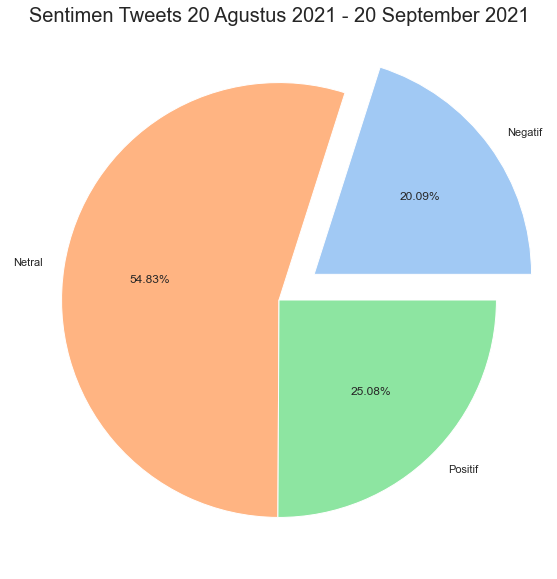

,sentiment_pred,count
0,Negatif,11482
1,Netral,31334
2,Positif,14333


In [447]:
#Pie Chart

pie_2021 = df_2021['sentiment_pred'].groupby(df_2021['sentiment_pred']).count().reset_index(name="count")

plt.subplots(figsize=(10,10))
plt.pie(
    pie_2021['count'],
    labels=pie_2021['sentiment_pred'],
    colors=palette_color,
    explode = [0.2, 0, 0],
    autopct='%.2f%%')
plt.title('Sentimen Tweets 20 Agustus 2021 - 20 September 2021', fontsize=20)
plt.show()
display(pie_2021)

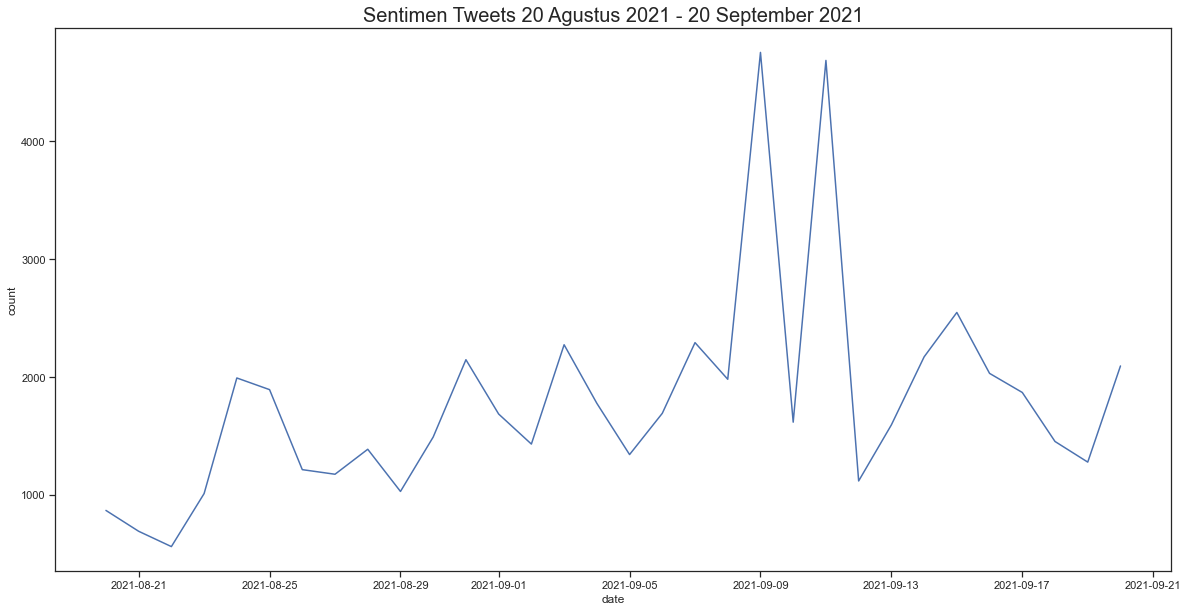

In [448]:
lineplot_2021 = df_2021[['sentiment_pred']].groupby(df_2021['date'].dt.floor('d')).size().reset_index(name='count')

plt.subplots(figsize=(20,10))
plt.title('Sentimen Tweets 20 Agustus 2021 - 20 September 2021', fontsize=20)
sns.lineplot(data=lineplot_2021, x="date", y="count")
plt.show()

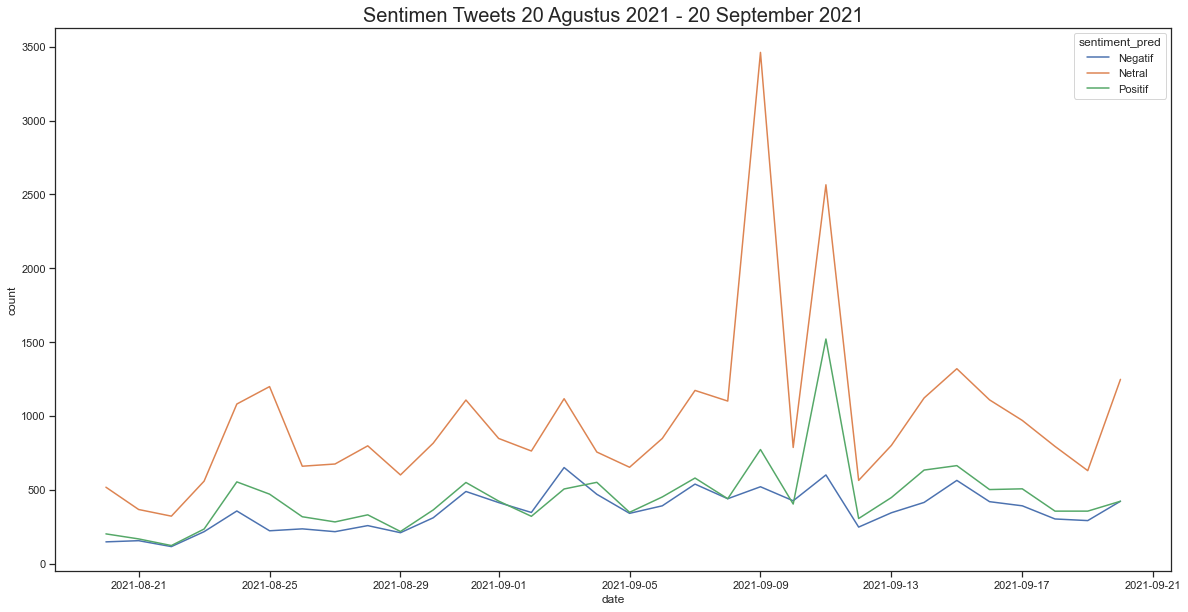

In [449]:
lineplot_2021 = df_2021[['sentiment_pred']].groupby([df_2021['date'].dt.floor('d'),df_2021['sentiment_pred']]).size().reset_index(name='count')

plt.subplots(figsize=(20,10))
plt.title('Sentimen Tweets 20 Agustus 2021 - 20 September 2021', fontsize=20)
sns.lineplot(data=lineplot_2021, x="date", y="count", hue='sentiment_pred')
plt.show()

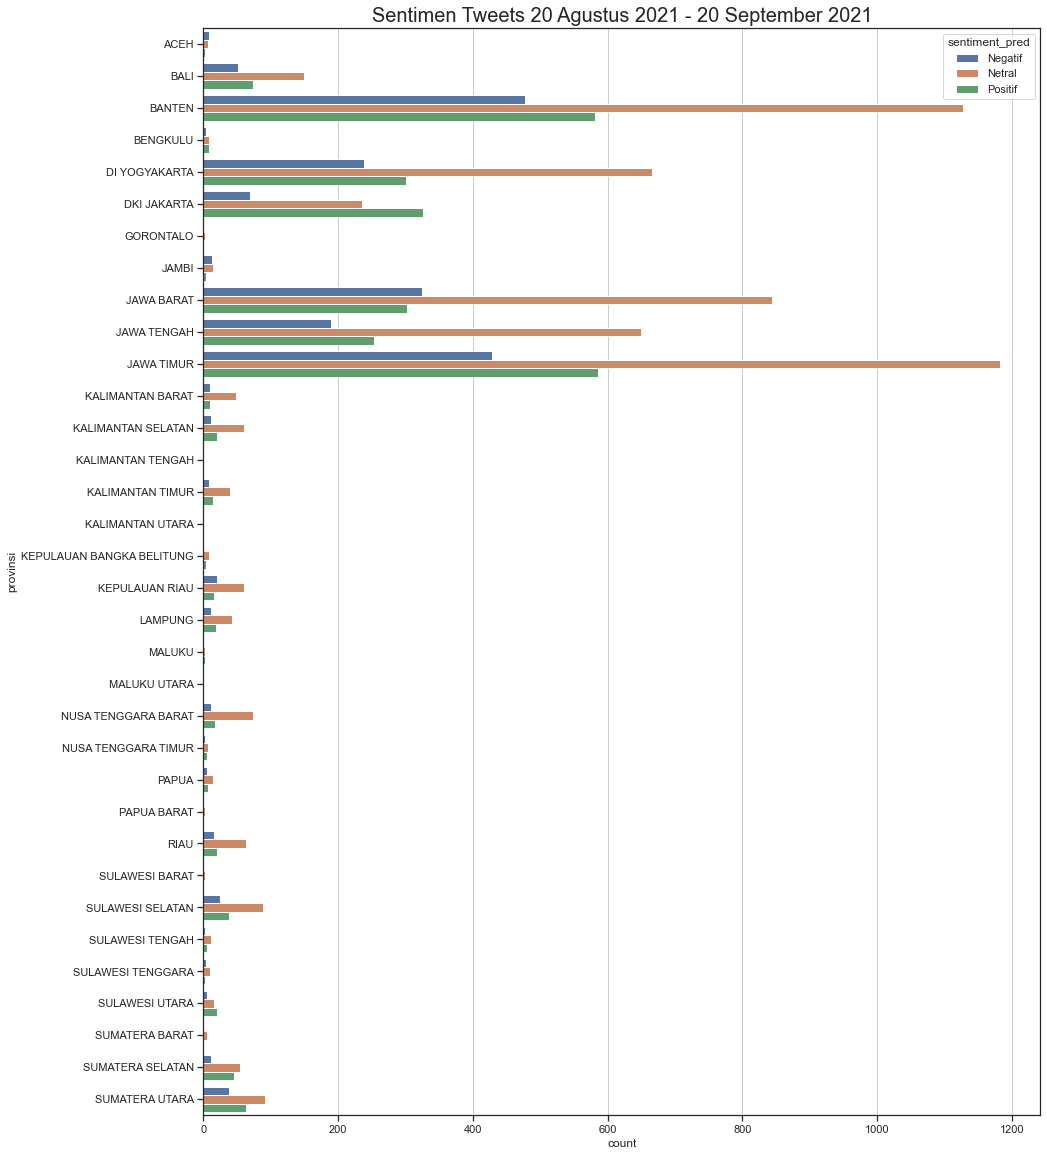

In [450]:
barplot_2021 = df_2021[['provinsi','sentiment_pred']].groupby([df_2021['provinsi'],df_2021['sentiment_pred']]).size().reset_index(name='count')

plt.subplots(figsize=(15,20))
plt.grid()
plt.title('Sentimen Tweets 20 Agustus 2021 - 20 September 2021', fontsize=20)
sns.barplot(data=barplot_2021, x="count", y="provinsi", hue="sentiment_pred")
plt.show()

In [481]:
from wordcloud import WordCloud

def wordcloud_gen(word_dict,title):
    wc = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(frequencies=word_dict)
    print(title)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Wordloud Tweets Positif 20 Agustus 2021 - 20 September 2021


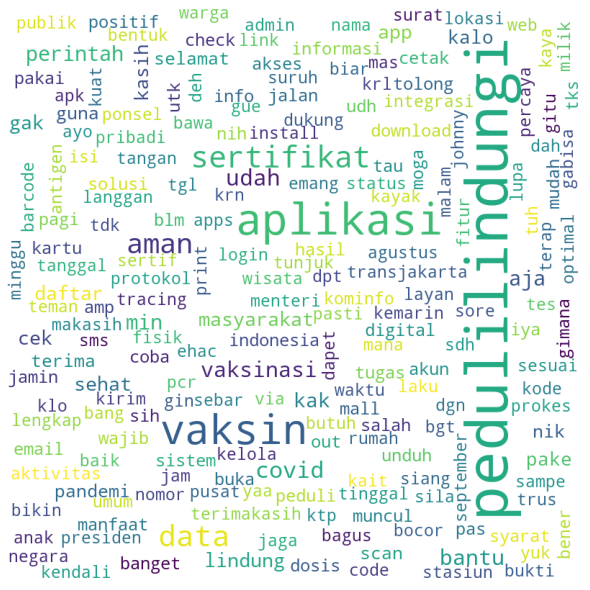

Wordloud Tweets Netral 20 Agustus 2021 - 20 September 2021


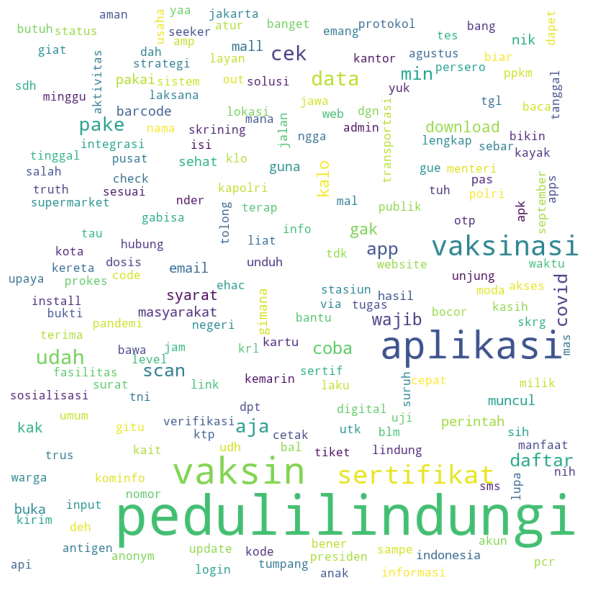

Wordloud Tweets Negatif 20 Agustus 2021 - 20 September 2021


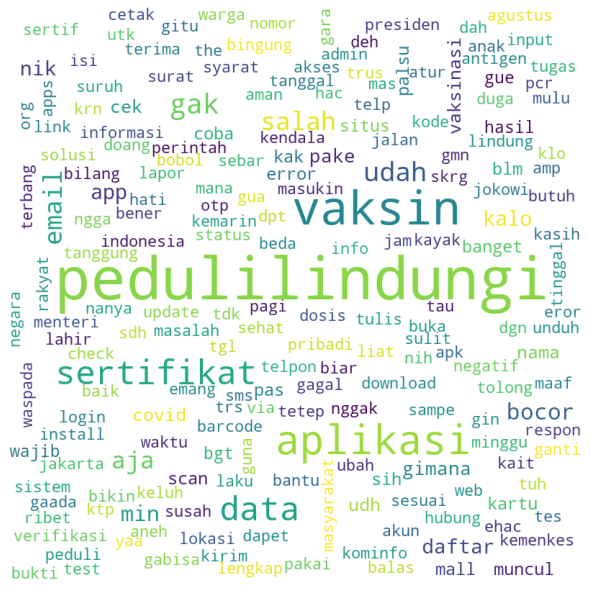

In [485]:
wordcloud_gen(
    dict(zip(df_positive_words_2021['word'].tolist(),df_positive_words_2021['count'].to_list())),
    'Wordloud Tweets Positif 20 Agustus 2021 - 20 September 2021')
wordcloud_gen(
    dict(zip(df_neutral_words_2021['word'].tolist(),df_neutral_words_2021['count'].to_list())),
    'Wordloud Tweets Netral 20 Agustus 2021 - 20 September 2021')
wordcloud_gen(
    dict(zip(df_negative_words_2021['word'].tolist(),df_negative_words_2021['count'].to_list())),
    'Wordloud Tweets Negatif 20 Agustus 2021 - 20 September 2021')

#### 2. Tweets 12 Januari 2022 s/d 12 Januari 2022

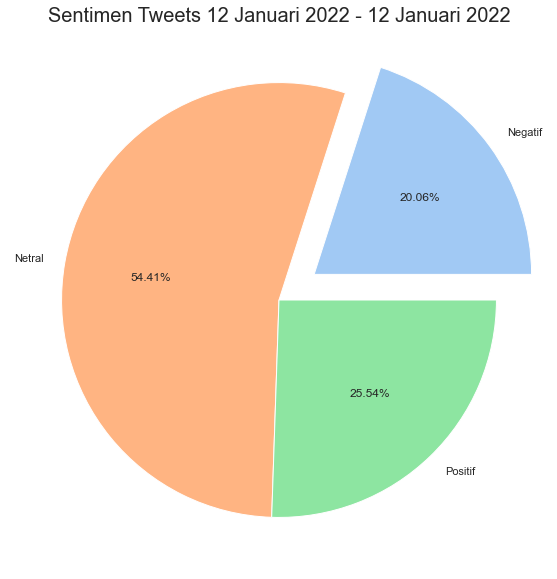

,sentiment_pred,count
0,Negatif,2434
1,Netral,6603
2,Positif,3099


In [451]:
#Pie Chart

pie_2022 = df_2022['sentiment_pred'].groupby(df_2022['sentiment_pred']).count().reset_index(name="count")

plt.subplots(figsize=(10,10))
plt.pie(
    pie_2022['count'],
    labels=pie_2022['sentiment_pred'],
    colors=palette_color,
    explode = [0.2, 0, 0],
    autopct='%.2f%%')
plt.title('Sentimen Tweets 12 Januari 2022 - 12 Januari 2022', fontsize=20)
plt.show()
display(pie_2022)

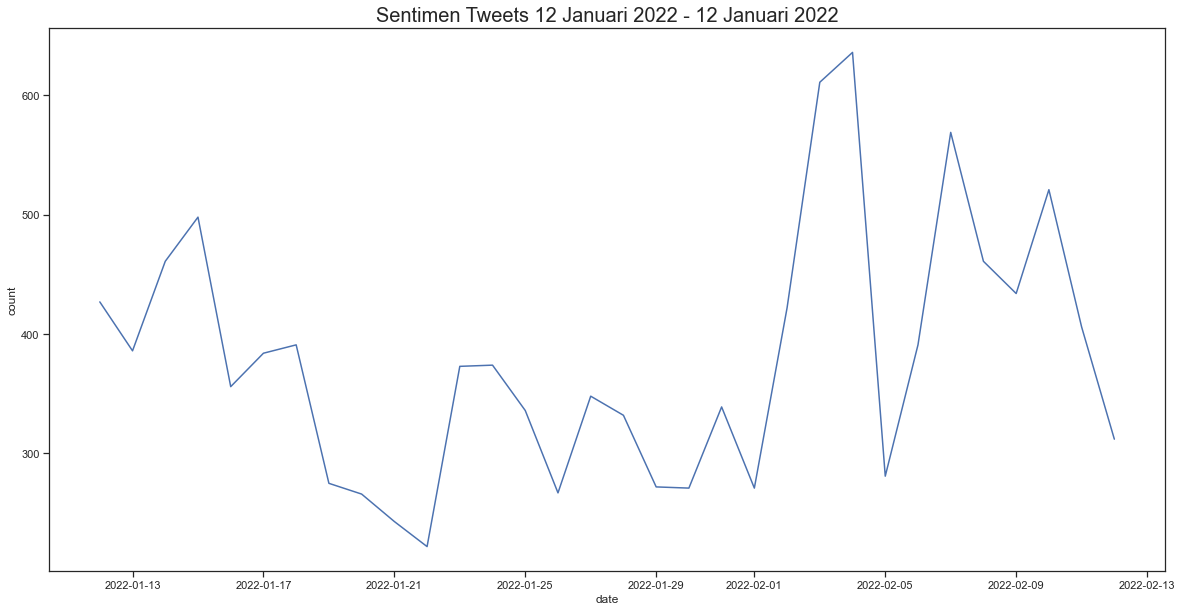

In [452]:
lineplot_2022 = df_2022[['sentiment_pred']].groupby(df_2022['date'].dt.floor('d')).size().reset_index(name='count')

plt.subplots(figsize=(20,10))
plt.title('Sentimen Tweets 12 Januari 2022 - 12 Januari 2022', fontsize=20)
sns.lineplot(data=lineplot_2022, x="date", y="count")
plt.show()

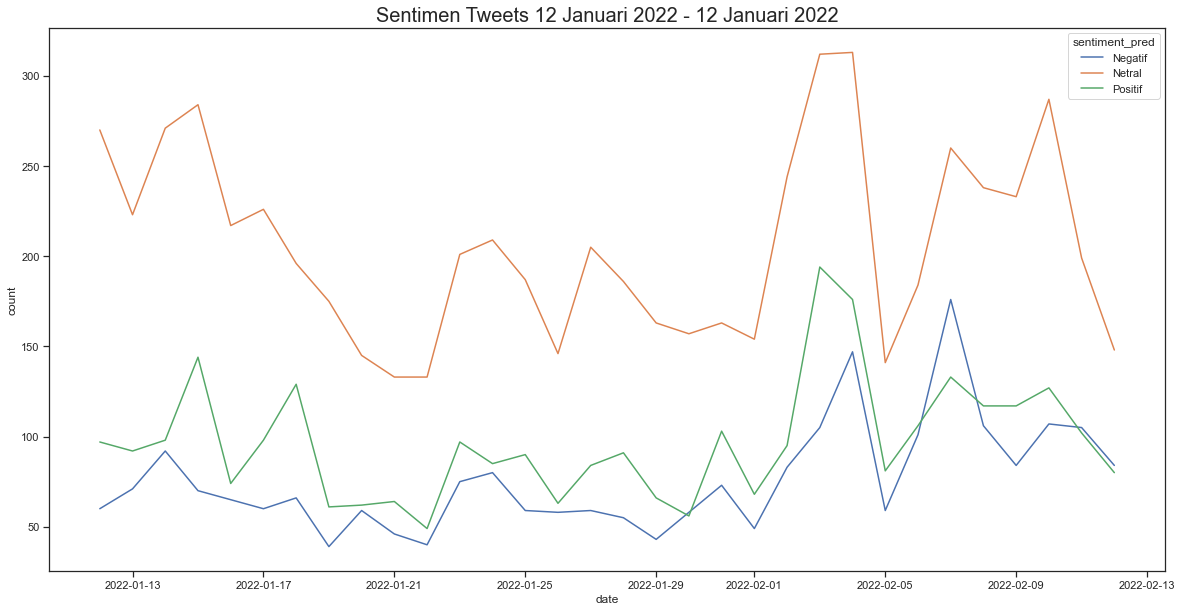

In [453]:
lineplot_2022 = df_2022[['sentiment_pred']].groupby([df_2022['date'].dt.floor('d'),df_2022['sentiment_pred']]).size().reset_index(name='count')

plt.subplots(figsize=(20,10))
plt.title('Sentimen Tweets 12 Januari 2022 - 12 Januari 2022', fontsize=20)
sns.lineplot(data=lineplot_2022, x="date", y="count", hue='sentiment_pred')
plt.show()

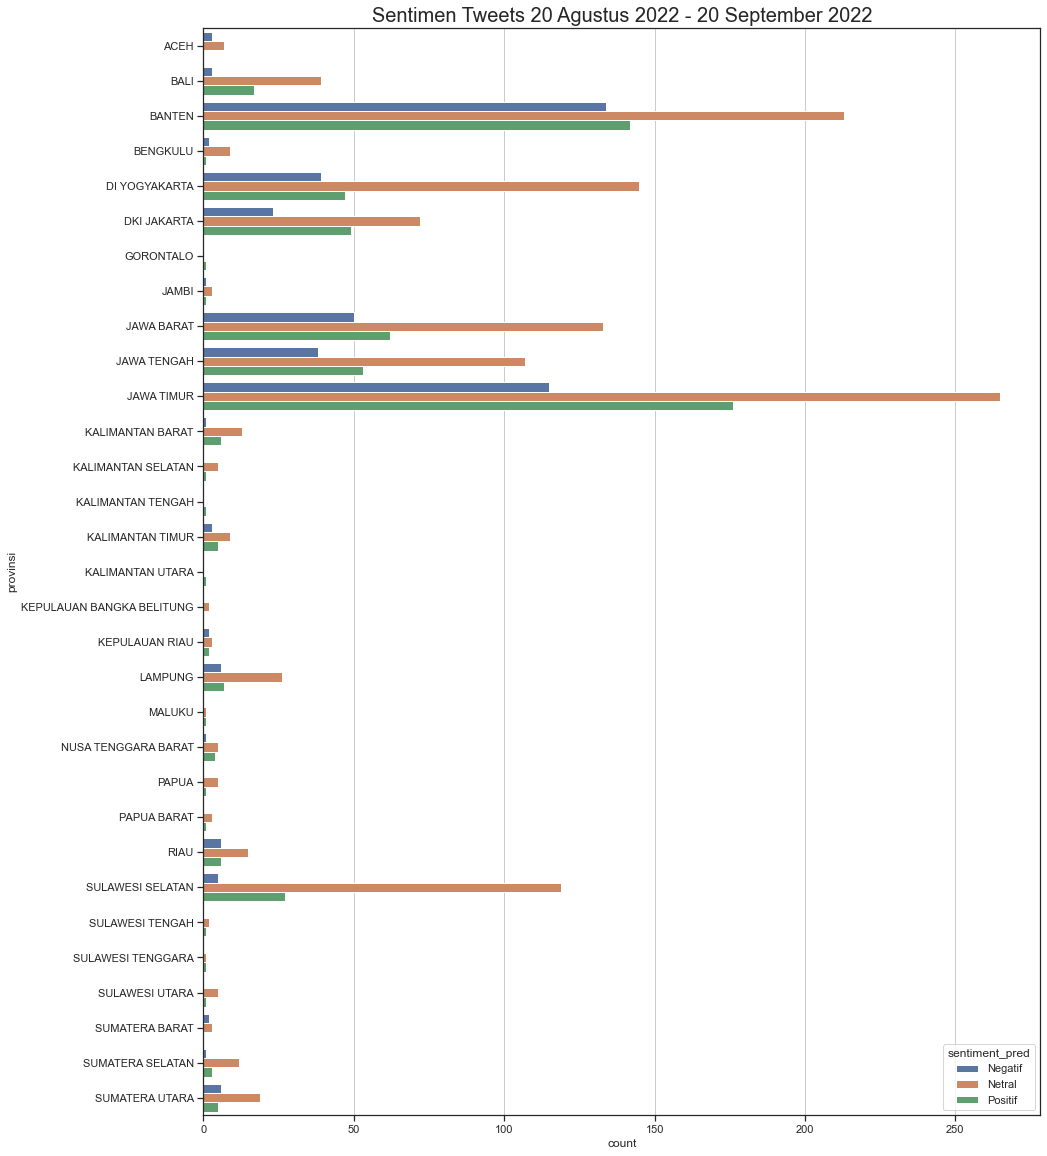

In [454]:
barplot_2022 = df_2022[['provinsi','sentiment_pred']].groupby([df_2022['provinsi'],df_2022['sentiment_pred']]).size().reset_index(name='count')

plt.subplots(figsize=(15,20))
plt.grid()
plt.title('Sentimen Tweets 20 Agustus 2022 - 20 September 2022', fontsize=20)
sns.barplot(data=barplot_2022, x="count", y="provinsi", hue="sentiment_pred")
plt.show()

Wordloud Tweets Positif 12 Januari 2022 - 12 Februari 2022


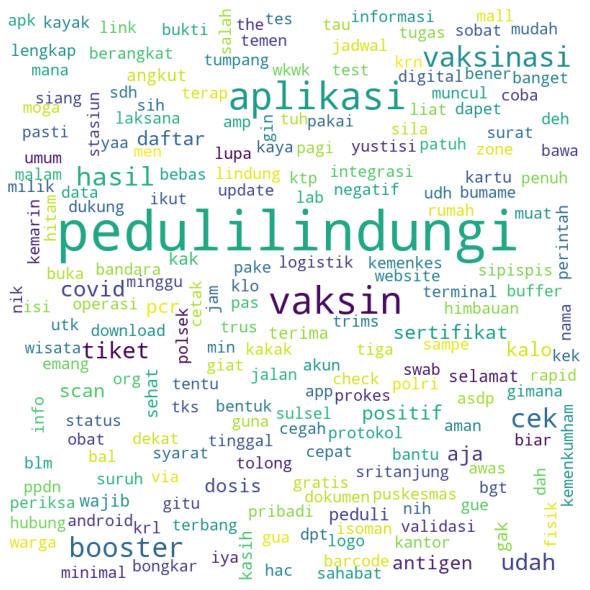

Wordloud Tweets Netral 12 Januari 2022 - 12 Februari 2022


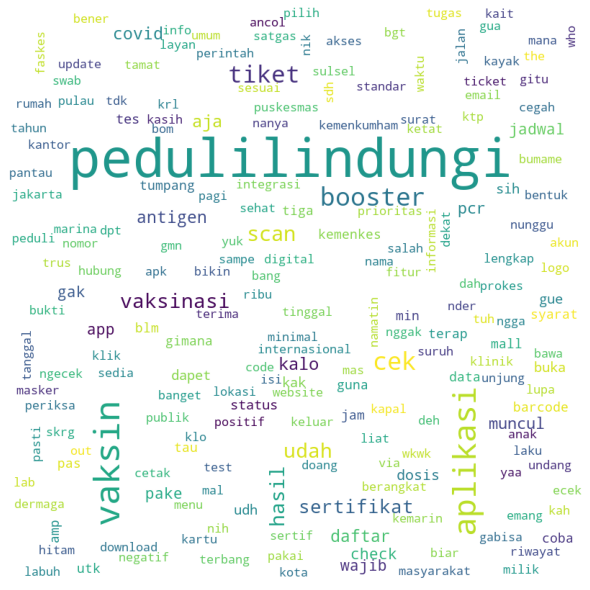

Wordloud Tweets Negatif 12 Januari 2022 - 12 Februari 2022


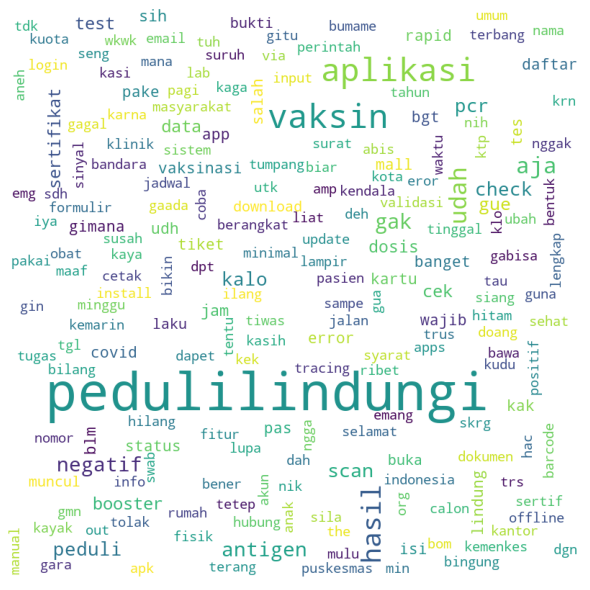

In [484]:
wordcloud_gen(
    dict(zip(df_positive_words_2022['word'].tolist(),df_positive_words_2022['count'].to_list())),
    'Wordloud Tweets Positif 12 Januari 2022 - 12 Februari 2022')
wordcloud_gen(
    dict(zip(df_neutral_words_2022['word'].tolist(),df_neutral_words_2022['count'].to_list())),
    'Wordloud Tweets Netral 12 Januari 2022 - 12 Februari 2022')
wordcloud_gen(
    dict(zip(df_negative_words_2022['word'].tolist(),df_negative_words_2022['count'].to_list())),
    'Wordloud Tweets Negatif 12 Januari 2022 - 12 Februari 2022')